In [119]:
import networkx

SEED = 50
graph = networkx.dense_gnm_random_graph(n=8, m=7, seed=SEED)
adjacency_matrix_for_graph = networkx.adjacency_matrix(graph)

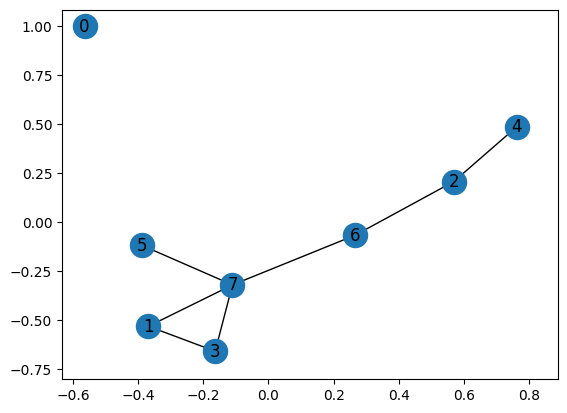

In [120]:
networkx.draw_networkx(
    graph,
    hide_ticks=False,
    with_labels=True,
    pos=networkx.spring_layout(graph, k=0.7, iterations=50),
)

In [124]:
from libs.snmf import detect_community_structure_for_symmetric_adjacent_matrix

communities = detect_community_structure_for_symmetric_adjacent_matrix(
    adjacency_matrix_for_graph.toarray(), expected_community_num_K=2, max_iter=100, seed=1
)
communities

/Users/ducth/PycharmProjects/community-structure-identification-sem232/libs/i_divergence_DX_calculator.py:29: RuntimeWarning: divide by zero encountered in log
  matrix_a * numpy.log(numpy.divide(matrix_a, matrix_b, where=matrix_b != 0)),
/Users/ducth/PycharmProjects/community-structure-identification-sem232/libs/i_divergence_DX_calculator.py:29: RuntimeWarning: invalid value encountered in multiply
  matrix_a * numpy.log(numpy.divide(matrix_a, matrix_b, where=matrix_b != 0)),
/Users/ducth/PycharmProjects/community-structure-identification-sem232/libs/snmf.py:79: RuntimeWarning: invalid value encountered in divide
  return community_indicator_H / numpy.linalg.norm(community_indicator_H, axis=1, keepdims=True)


[{2, 4, 6}, {1, 3, 5, 7}]

Use for filtering out lonely nodes

In [78]:
node_in_community = set()
for community in communities:
    node_in_community = node_in_community.union(community)
draw_nodes = [node for node in list(graph) if node in node_in_community]

(-1.0, 1.0)

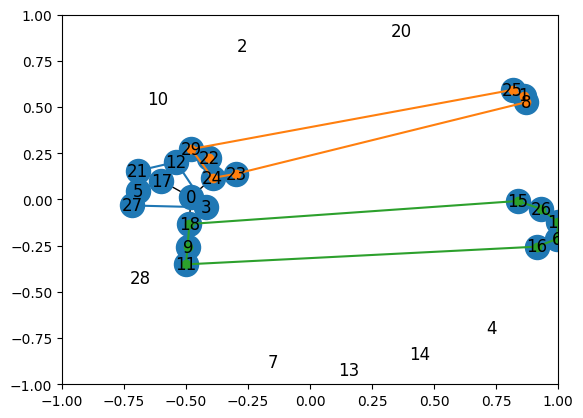

In [98]:
import matplotlib.pyplot as plt
import numpy
from scipy.spatial import ConvexHull
from matplotlib.collections import LineCollection


pos = networkx.spring_layout(graph, k=1, iterations=300)


boundary_list = []
for index, community in enumerate(communities):
    grouped_node_position = numpy.vstack([pos[node] for node in community])
    boundary_list.append(ConvexHull(grouped_node_position))

graph = networkx.from_scipy_sparse_array(adjacency_matrix_for_graph)


ax = plt.subplot()
networkx.draw_networkx(
    graph,
    hide_ticks=False,
    with_labels=True,
    nodelist=draw_nodes,
    pos=pos,
    ax=ax,
)

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for index, boundary in enumerate(boundary_list):
    ax.plot(boundary.points[:, 0], boundary.points[:, 1], "o")
    line_segments = [boundary.points[simplex] for simplex in boundary.simplices]
    ax.add_collection(LineCollection(line_segments, colors=[colors[index]], linestyle="solid"))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)